## Clustering

Clustering is the most well-known unsupervised learning technique. The goal of clustering is to discover groups in observations. The groups are called clusters. 

The data points in the same cluster are similar to each other, compared to points in different clusters, which are relatively dissimilar.

There are many clustering algorithms. In this notebook, we will focus on two of them:
1. One that requires the **number of clusters** ($k$) to be specified: **K-means**. 
2. And another that does _NOT_ require the **number of clusters** to be specified: **DBSCAN**.

To compare the performance of the clustering algorithms, in the code below we will use the same six datasets capturing a wide variety of patterns and structures. 

In [8]:
datasets['blobs']

,x1,x2
0,-5.730354,-7.583286
1,1.942992,1.918875
2,6.829682,1.164871
3,-2.901306,7.550771
4,5.841093,1.565094
...,...,...
495,-5.480272,-5.955476
496,-2.586299,9.355438
497,4.304094,3.642191
498,-7.402350,-5.831100


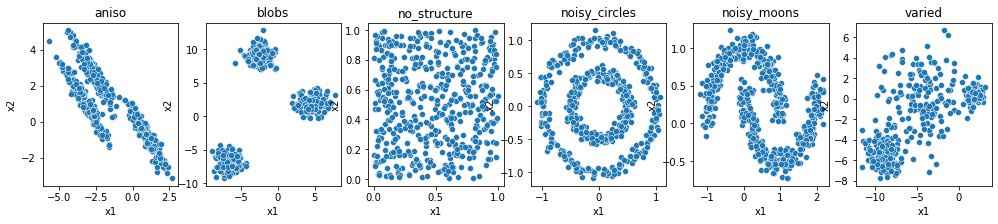

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns 

url = "https://raw.githubusercontent.com/fahadsultan/datascience_ml/main/data/clusters/"

fnames = ["aniso", "blobs", "no_structure", "noisy_circles", "noisy_moons", "varied"]

datasets = {}

fig, axs = plt.subplots(1, len(fnames), figsize=(17, 3))
for i, fname in enumerate(fnames):
    df = pd.read_csv(url + fname + ".csv", index_col=0)
    df.columns = ['x1', 'x2']
    ax = sns.scatterplot(data=df, x='x1', y='x2', ax=axs[i]);
    ax.set(title=fname)
    datasets[fname] = df

Note that the data sets are **not labeled**. Also note that unsupervised learning algorithms do not work only with 2-dimensional data but with data of any dimensionality. Here we use 2-dimensional data only to be able to visualize the results.

### K-means

The k-means algorithm is a simple and popular clustering algorithm. It is an iterative algorithm that partitions the data points into a pre-specified $k$ number of clusters. 

The algorithm works as follows: 
1. **Start**: Select $k$ random points as the initial centroids.
2. **Update Cluster Assignments**: Assign each data point to the cluster with the nearest centroid.
3. **Update Cluster Centers**: Update the centroids of the clusters by taking the average of the data points in each cluster.
4. Repeat steps 2 and 3 until the centroids do not change.

The animation below visualizes the algorithm: 
<center><img width="50%" src="https://miro.medium.com/v2/resize:fit:960/1*h2WdqGZD6WsNcUdwZDqsFA.gif"></center>

The algorithm is guaranteed to converge to a result. However, the result may not be the optimal one. 

Because of random initialization, the algorithm converges to different results on different runs. Such algorithms or processes, where there is an element of randomness but with some bounds of predictability, are called **stochastic** algorithms or processes.

#### Before Clustering

Let's try the k-means algorithm on the blobs dataset first. Note that the raw data has just two features (`x1` and `x2`) but no labels. 

In [10]:
X = datasets['blobs']
X.head()

,x1,x2
0,-5.730354,-7.583286
1,1.942992,1.918875
2,6.829682,1.164871
3,-2.901306,7.550771
4,5.841093,1.565094


The code below plots the raw data as a scatter plot.

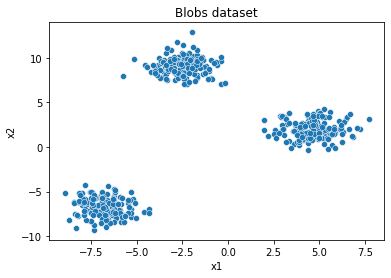

In [11]:
sns.scatterplot(data=X, x='x1', y='x2');
plt.title("Blobs dataset");

Note that there are clearly three clusters in the data where the points within each cluster are closer to each other compared to points across clusters.

#### Clustering

We will use the `KMeans` class from the `sklearn.cluster` module.

The constructor of the `KMeans` class takes the number of clusters $k$ as input.

The `KMeans` class has a `fit()` method that takes the data as input and runs the k-means algorithm on it. 

After we fit the model to the data, we can use the `.labels_` attribute to get the discovered labels of the clusters assigned to each data point.

Below we add a third feature `label` to the data, which is the cluster label assigned to each data point by the k-means algorithm.

In [13]:
X

,x1,x2
0,-5.730354,-7.583286
1,1.942992,1.918875
2,6.829682,1.164871
3,-2.901306,7.550771
4,5.841093,1.565094
...,...,...
495,-5.480272,-5.955476
496,-2.586299,9.355438
497,4.304094,3.642191
498,-7.402350,-5.831100


In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [17]:
len(kmeans.labels_) == len(X)

True

In [18]:
X['label'] = kmeans.labels_

X.head()

,x1,x2,label
0,-5.730354,-7.583286,1
1,1.942992,1.918875,2
2,6.829682,1.164871,2
3,-2.901306,7.550771,0
4,5.841093,1.565094,2


#### After Clustering

The code below plots the data again, but this time with the cluster labels.

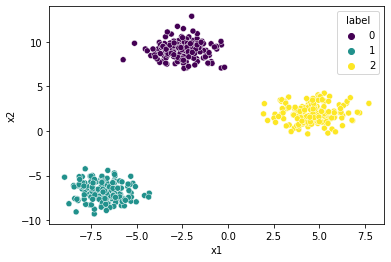

In [19]:
import seaborn as sns 
sns.scatterplot(data=X, x='x1', y='x2', hue='label', palette='viridis');

Note that the k-means algorithm has perfectly discovered the three blobs in the data.

#### Limitations of K-means

K-means is a simple and popular clustering algorithm. However, it has some limitations: 

1. It requires the number of clusters $k$ to be specified. If the number of clusters is not known in advance, then we need to try different values of $k$ and select the one that gives the best results.

2. It is sensitive to the initial random selection of centroids. The algorithm may converge to different results on different runs.

3. Since k-means is reliant on averages, it is sensitive to outliers. Outliers can significantly affect the location of the centroids and hence the clusters.

4. **Most importantly**, k-means does not work well with clusters of different sizes and densities. **It assumes that the clusters are spherical and of similar size**.

To illustrate this limitation, let's try the k-means algorithm on a dataset that does not satisfy the assumptions of the algorithm.

         x1        x2
0 -0.469276  0.210118
1 -0.164164  0.986075
2 -0.471454  0.019974
3 -0.670347 -0.657977
4 -0.826468  0.594071


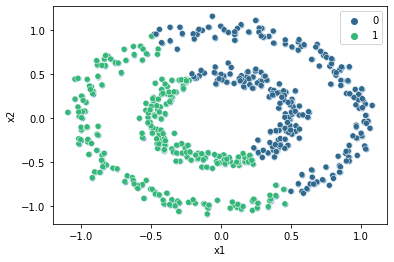

In [20]:
X = datasets['noisy_circles']
print(X.head())
sns.scatterplot(data=X, x='x1', y='x2');

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
sns.scatterplot(data=X, x='x1', y='x2', hue=kmeans.labels_, palette='viridis');


Note how the k-means algorithm fails to discover the two clusters in the data. This is because the clusters are a) not spherical and b) of different sizes.

Such failures of a clustering algorithm can only be detected by either visualizing the results or computing internal cluster validation metrics such as the silhouette score. 

##### Silhouette Score

The Silhouette Score is calculated using the **mean intra-cluster distance ($a$)** and the **mean nearest-cluster distance ($b$)** for each sample. The Silhouette Coefficient for a sample is 

$$\text{Silhouette Coefficient} = \frac{(b - a)}{\text{max}(a, b)}$$

where $b$ is the distance between a sample and the nearest cluster that the sample is not a part of. 

Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

`sklearn.metrics.silhouette_score` function returns the mean Silhouette Coefficient over all samples. To obtain the values for each sample, use `silhouette_samples`.

**The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters**. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

A score of 1 indicates that the object is far away from the neighboring clusters. A score of 0 indicates that the object is close to the decision boundary between two neighboring clusters. A score of -1 indicates that the object may have been assigned to the wrong cluster.

In [230]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.5080136392845614

### DBSCAN

DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. It is a density-based clustering algorithm. It is a popular clustering algorithm because it does not require the number of clusters to be specified. It can discover clusters of arbitrary shapes. It can also identify outliers in the data.

The algorithm has **two parameters**: 

1. **$\epsilon$**: maximum distance between two points for them to be considered as in the same neighborhood. 
2. **$m$**: minimum number of points required to form a dense region.


The algorithm works as follows:

1. It starts with an arbitrary point in the data set that has not been visited.
2. It finds all of the points in the neighborhood of the point, using a distance measure $\epsilon$.
3. If there are at least $m$ points in the neighborhood, it starts a cluster with the initial point as its first member. It also visits all of the points in the neighborhood and adds them to the cluster.
4. If there are less than $m$ points in the neighborhood, the point is labeled as noise.
5. If a point is part of a cluster, its neighborhood is also part of that cluster. Hence, all of the points in the neighborhood are added to the cluster.
6. The algorithm repeats steps 1 to 5 until all of the points have been visited.

<center><img src="https://cdn-images-1.medium.com/v2/resize:fit:640/1*tc8UF-h0nQqUfLC8-0uInQ.gif"></center>

<br/>

Note that despite the random initialization, DBSCAN is a deterministic algorithm. That is, it always produces the same result on the same data set.

#### Before Clustering

         x1        x2
0 -0.469276  0.210118
1 -0.164164  0.986075
2 -0.471454  0.019974
3 -0.670347 -0.657977
4 -0.826468  0.594071


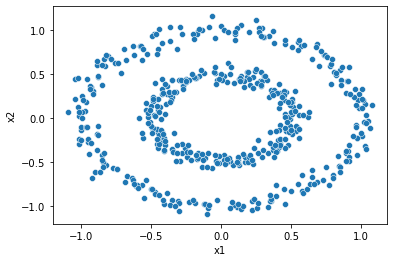

In [22]:
X = datasets['noisy_circles']
print(X.head())
sns.scatterplot(data=X, x='x1', y='x2');

#### Clustering

DBSCAN is implemented in the `DBSCAN` class from the `sklearn.cluster` module.

The constructor of the `DBSCAN` class takes the two parameters $\epsilon$ and $m$ as input.

Similar to `KMeans`, the `DBSCAN` class has a `fit()` method that takes the data as input and runs the DBSCAN algorithm on it.

After we fit the model to the data, we can use the `.labels_` attribute to get the discovered labels of the clusters assigned to each data point.

In [23]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)
X['label'] = dbscan.labels_

#### After clustering

The code below plots the data again, but this time with the cluster labels.

         x1        x2  label
0 -0.469276  0.210118      0
1 -0.164164  0.986075      1
2 -0.471454  0.019974      0
3 -0.670347 -0.657977      1
4 -0.826468  0.594071      1


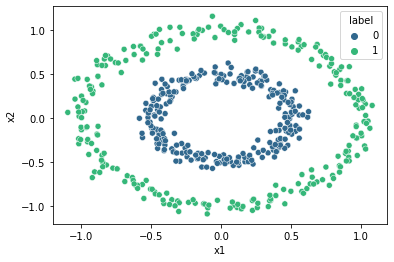

In [24]:
print(X.head())

sns.scatterplot(data=X, x='x1', y='x2', hue='label', palette='viridis');

Just because DBSCAN does better than k-means on the circles dataset, it does not mean that DBSCAN is always better than k-means. Each clustering algorithm has its own strengths and weaknesses.

### Comparing DBSCAN and K-means

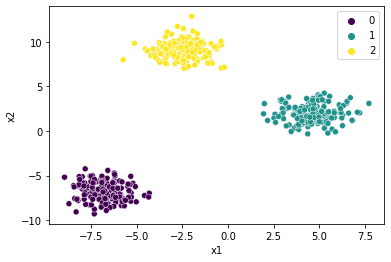

In [38]:
X = datasets['blobs']
X.head()

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2, min_samples=5)
dbscan.fit(X)
clusters = dbscan.labels_

sns.scatterplot(data=X, x='x1', y='x2', hue=clusters, palette='viridis');

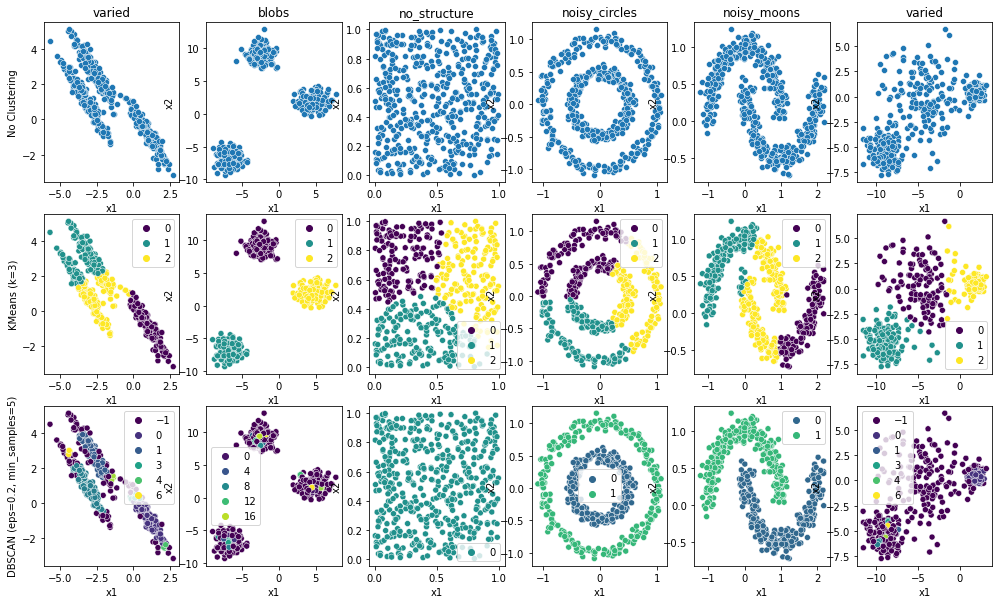

In [29]:
fnames = ["aniso", "blobs", "no_structure", "noisy_circles", "noisy_moons", "varied"]

datasets = {}

fig, axs = plt.subplots(3, len(fnames), figsize=(17, 10))

for i, fname in enumerate(fnames):
    df = pd.read_csv(url + fname + ".csv", index_col=0)
    df.columns = ['x1', 'x2']
    datasets[fname] = df
    kmeans = KMeans(n_clusters=3, random_state=0)
    kmeans.fit(df)
    kmeans_labels = kmeans.labels_
    dbscan = DBSCAN(eps=0.2, min_samples=5)
    dbscan.fit(df)
    dbscan_labels = dbscan.labels_
    
    ax = sns.scatterplot(data=df, x='x1', y='x2', ax=axs[0][i]);
    ax.set(title=fname)
    ax = sns.scatterplot(data=df, x='x1', y='x2', hue=kmeans_labels, ax=axs[1][i],  palette='viridis');
    ax = sns.scatterplot(data=df, x='x1', y='x2', hue=dbscan_labels, ax=axs[2][i],  palette='viridis');

    axs[0][0].set(title=fname, ylabel='No Clustering')
    axs[1][0].set(ylabel='KMeans (k=3)')
    axs[2][0].set(ylabel='DBSCAN (eps=0.2, min_samples=5)')

Note that the two algorithms work better on different datasets.

Furthermore, the parameters of the two algorithms ($k$ for nearest neighbor and $\epsilon$ and $m$ for DBSCAN) need to be tuned to get the best results for an individual datasets. 

### Limitations of Clustering

Note that not all data sets are suitable for clustering. Some data sets do not have a well-defined cluster structure. 

For example, below we try the k-means algorithm on the sentiments dataset. We know that the data set has three classes: positive, negative, and neutral. However, the k-means algorithm fails to discover the three classes. This is because the data set does not have a well-defined cluster structure.

In [39]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/fahadsultan/datascience_ml/main/data/chat_dataset.csv')
data.head()

,message,sentiment
0,I really enjoyed the movie,positive
1,The food was terrible,negative
2,I'm not sure how I feel about this,neutral
3,The service was excellent,positive
4,I had a bad experience,negative


In [174]:
vocab = ' '.join(data['message'].values).lower().split()
vocab = list(set(vocab))

bow = pd.DataFrame(0, columns=vocab, index=data.index)
for word in vocab:
    bow[word] = data['message'].apply(lambda x: x.lower().split().count(word))

kmeans = KMeans(n_clusters=3, random_state=0)

def l2_norm(x):
    return (sum(x**2))**(1/2)

bow = bow.apply(lambda x: x/l2_norm(x), axis=1)
kmeans.fit(bow)

data['label'] = kmeans.labels_

In [181]:
data['label'].value_counts()

1    201
2    199
0    184
Name: label, dtype: int64

In [182]:
data.groupby(['label', 'sentiment']).size()

label  sentiment
0      negative      50
       neutral       72
       positive      62
1      negative      69
       neutral       70
       positive      62
2      negative      28
       neutral      117
       positive      54
dtype: int64

### Relationship between Clusters and Labels

Please take caution in comparing the discovered clusters with any available labels for a dataset. 

In clustering, the label 'values' are arbitrary. For example, if we have a dataset with three classes, we can label them as 0, 1, and 2 or as 1, 2, and 3 or as 100, 200, and 300.

In [236]:
from sklearn.datasets import load_iris

data = load_iris(as_frame=True)
X    = data['data']

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
cluster_labels = kmeans.labels_

y    = data['target']

sum(cluster_labels == y)/len(y)

0.24

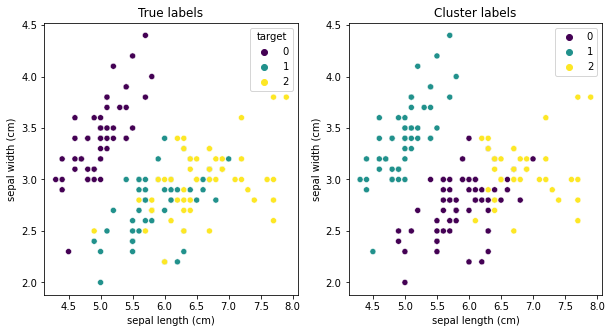

In [237]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

ax = sns.scatterplot(data=X, \
                x='sepal length (cm)', \
                y='sepal width (cm)', \
                hue=y, \
                palette='viridis', ax=axs[0]);
ax.set(title="True labels");

ax = sns.scatterplot(data=X, \
                x='sepal length (cm)', \
                y='sepal width (cm)', \
                hue=preds, \
                palette='viridis', ax=axs[1]);
ax.set(title="Cluster labels");